In [147]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(mouse_drug_df, clinical_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [276]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tv_df = df.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"mean"}).reset_index()

# Convert to DataFrame
mean_tv_df.apply(pd.Series)
# Preview DataFrame
mean_tv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [149]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tv_df = df.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"sem"}).reset_index()
# Convert to DataFrame
se_tv_df.apply(pd.Series)
# Preview DataFrame
se_tv_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [215]:
# Minor Data Munging to Re-Format the Data Frames
munged_data = pd.pivot_table(mean_tv_df,values ="Tumor Volume (mm3)",index="Timepoint",columns="Drug")


# Preview that Reformatting worked
munged_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


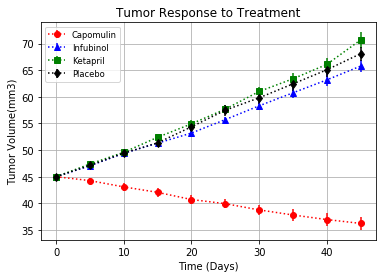

In [211]:
# Generate the Plot (with Error Bars)
capomulin_atv = mean_tv_df[mean_tv_df.Drug == "Capomulin"] 
capomulin_std = se_tv_df[se_tv_df.Drug == "Capomulin"]
infubinol_atv = mean_tv_df[mean_tv_df.Drug == "Infubinol"] 
infubinol_std = se_tv_df[se_tv_df.Drug == "Infubinol"]
ketapril_atv = mean_tv_df[mean_tv_df.Drug == "Ketapril"] 
ketapril_std = se_tv_df[se_tv_df.Drug == "Ketapril"]
placebo_atv = mean_tv_df[mean_tv_df.Drug == "Placebo"] 
placebo_std = se_tv_df[se_tv_df.Drug == "Placebo"]

#Generate Plots
max = mean_tv_df.Timepoint.max()
max = max + 1
x_axis = np.arange(0, max, 5)


fig, ax = plt.subplots()
Capomulin = ax.errorbar(x_axis, capomulin_atv["Tumor Volume (mm3)"], capomulin_std["Tumor Volume (mm3)"], fmt = "or",ls = 'dotted')
Infubinol = ax.errorbar(x_axis, infubinol_atv["Tumor Volume (mm3)"], infubinol_std["Tumor Volume (mm3)"], fmt = "^b",ls = 'dotted')
Ketapril = ax.errorbar(x_axis, ketapril_atv["Tumor Volume (mm3)"], ketapril_std["Tumor Volume (mm3)"], fmt = "sg",ls= 'dotted' )
Placebo = ax.errorbar(x_axis, placebo_atv["Tumor Volume (mm3)"], placebo_std["Tumor Volume (mm3)"], fmt = "dk",ls= 'dotted')

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Tumor Response to Treatment")
plt.grid()
    
legend=plt.legend(
    handles=[Capomulin,Infubinol,Ketapril,Placebo],
    labels=['Capomulin','Infubinol','Ketapril','Placebo'],
    fontsize='small',
    markerscale=1
)

plt.savefig("Images/Tumor_response.png")

## Metastatic Response to Treatment

In [274]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_df = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
mean_met_df_group = pd.DataFrame(mean_met_df)
mean_met_df = mean_met_df.reset_index()
# Preview DataFrame
mean_met_df_group.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [185]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_met_df = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
se_met_df_group = pd.DataFrame(se_met_df)
se_met_df = se_met_df.reset_index()
# Preview DataFrame
se_met_df_group.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [180]:
# Minor Data Munging to Re-Format the Data Frames
meta_munged_data = pd.pivot_table(mean_met_df,values ="Metastatic Sites",index="Timepoint",columns="Drug")                                                              
# Preview that Reformatting worked
meta_munged_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


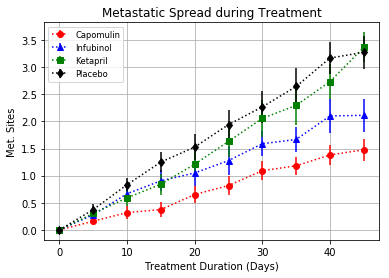

In [210]:
# Generate the Plot (with Error Bars)
capomulin_ams = mean_met_df[mean_met_df.Drug == "Capomulin"] 
capomulin_sms = se_met_df[se_met_df.Drug == "Capomulin"]
infubinol_ams = mean_met_df[mean_met_df.Drug == "Infubinol"] 
infubinol_sms = se_met_df[se_met_df.Drug == "Infubinol"]
ketapril_ams = mean_met_df[mean_met_df.Drug == "Ketapril"] 
ketapril_sms = se_met_df[se_met_df.Drug == "Ketapril"]
placebo_ams = mean_met_df[mean_met_df.Drug == "Placebo"] 
placebo_sms = se_met_df[se_met_df.Drug == "Placebo"]

max = se_met_df.Timepoint.max()
max = max + 1
x_axis = np.arange(0, max, 5)

fig, ax = plt.subplots()
Capomulin = ax.errorbar(x_axis, capomulin_ams["Metastatic Sites"], capomulin_sms["Metastatic Sites"], fmt = "or",ls = 'dotted')
Infubinol = ax.errorbar(x_axis, infubinol_ams["Metastatic Sites"], infubinol_sms["Metastatic Sites"], fmt = "^b",ls = 'dotted')
Ketapril = ax.errorbar(x_axis, ketapril_ams["Metastatic Sites"], ketapril_sms["Metastatic Sites"], fmt = "sg",ls= 'dotted' )
Placebo = ax.errorbar(x_axis, placebo_ams["Metastatic Sites"], placebo_sms["Metastatic Sites"], fmt = "dk",ls= 'dotted')

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread during Treatment")
plt.grid()
    
legend=plt.legend(
    handles=[Capomulin,Infubinol,Ketapril,Placebo],
    labels=['Capomulin','Infubinol','Ketapril','Placebo'],
    fontsize='small',
    markerscale=1
)




# Save the Figure
plt.savefig("Images/Metastatic Spread.png")
# Show the Figure
plt.show()

## Survival Rates

In [194]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
sr_df = df.groupby(["Drug","Timepoint"]).agg({"Mouse ID":"count"}).reset_index()
# Convert to DataFrame
sr_df.apply(pd.Series)
# Preview DataFrame
sr_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [213]:
# Minor Data Munging to Re-Format the Data Frames
survival_munged_data = pd.pivot_table(sr_df,values ="Mouse ID",index="Timepoint",columns="Drug")   
# Preview the Data Frame
survival_munged_data.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


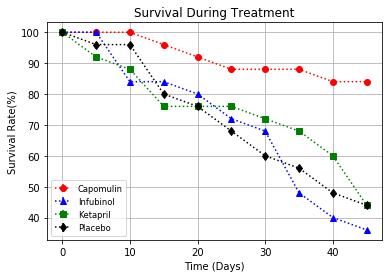

In [209]:
# Generate the Plot (Accounting for percentages)
capomulin_p = sr_df[sr_df.Drug == "Capomulin"]
infubinol_p = sr_df[sr_df.Drug == "Infubinol"]
ketapril_p = sr_df[sr_df.Drug == "Ketapril"]
placebo_p = sr_df[sr_df.Drug == "Placebo"]
start_pop = 25
capomulin_p["Percentage"] = capomulin_p["Mouse ID"] / start_pop * 100
infubinol_p["Percentage"] = infubinol_p["Mouse ID"] / start_pop * 100
ketapril_p["Percentage"] = ketapril_p["Mouse ID"] / start_pop * 100
placebo_p["Percentage"] = placebo_p["Mouse ID"] / start_pop * 100
max = sr_df.Timepoint.max()
max = max + 1
x_axis = np.arange(0,max,5) 

fig, ax = plt.subplots()
Capomulin = ax.errorbar(x_axis, capomulin_p["Percentage"], 0, fmt = "or",ls = 'dotted')
Infubinol = ax.errorbar(x_axis, infubinol_p["Percentage"], 0, fmt = "^b",ls = 'dotted')
Ketapril = ax.errorbar(x_axis, ketapril_p["Percentage"], 0, fmt = "sg",ls= 'dotted' )
Placebo = ax.errorbar(x_axis, placebo_p["Percentage"], 0, fmt = "dk",ls= 'dotted')

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")
plt.grid()
    
legend=plt.legend(
    handles=[Capomulin,Infubinol,Ketapril,Placebo],
    labels=['Capomulin','Infubinol','Ketapril','Placebo'],
    fontsize='small',
    markerscale=1
)





# Save the Figure
plt.savefig("Images/survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [298]:
# Calculate the percent changes for each drug
end_volume = mean_tv_df[mean_tv_df.Timepoint == 45]
end_volume["Percent Change"] = (end_volume["Tumor Volume (mm3)"] - 45) / 45 * 100
drug_perc = end_volume.groupby("Drug").agg({"Percent Change":"max"})
drug_perc


,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


(-1, 4)

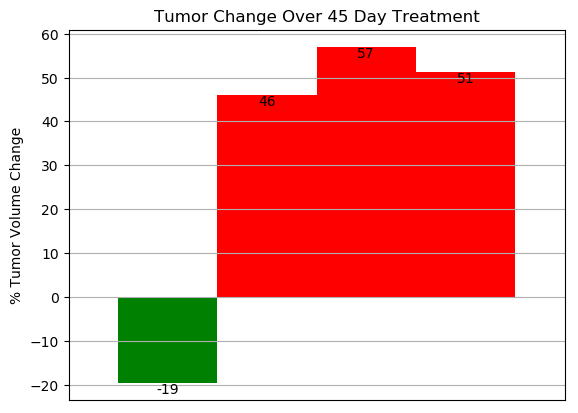

In [400]:
drugs_df = pd.DataFrame(drug_perc)

drugs_df["Drug"] = drugs_df.index

drugs_df

drugs = drugs_df["Percent Change"]

fig, ax = plt.subplots()
x_axis = np.arange(len(drugs))
width = 1
colors = ['green','red','red','red']
barlist = ax.bar(x_axis, drugs, width, color=colors)

def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='top')
plt.grid(b=None, which='major', axis='both')
autolabel(barlist)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

xtick_marks = drugs_df["Percent Change"]
xtick_names = ax.set_xticklabels(xtick_marks)
ax.set_xticks(drugs)
xbuffer = 1
ax.set_xlim(-xbuffer,len(drugs)-1+xbuffer)



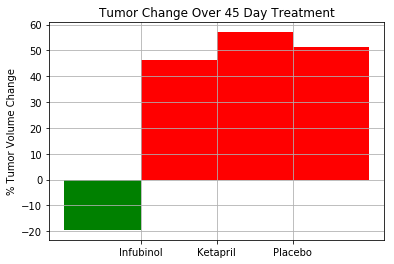

In [375]:
# Store all Relevant Percent Changes into a Tuple
drugs_df = pd.DataFrame(drug_perc)

drugs_df["Drug"] = drugs_df.index


# Splice the data between passing and failing drugs
drugs_x_negative_growth = drugs_df.loc[drugs_df["Percent Change"] < 0,"Percent Change"]
drugs_x_positive_growth = drugs_df.loc[drugs_df["Percent Change"] >= 0,"Percent Change"]
tumor_y = drugs_df["Percent Change"]

fig, ax = plt.subplots()

# width = -5
# ax.barh(tumor_y, width, color="blue") #??
x_axis = np.arange(0,1)
ax.set_xticks(x_axis)
tick_label = drugs_df.loc[drugs_df["Percent Change"] < 0,'Drug']
ax.bar(x_axis, drugs_x_negative_growth, color='g', tick_label = tick_label, align="edge",width=1, linewidth=10)
tick_locations = tick_label
x_axis = np.arange(1,4)
ax.set_xticks(x_axis+1)
tick_labels = drugs_df.loc[drugs_df["Percent Change"] >= 0,'Drug']
ax.bar(x_axis, drugs_x_positive_growth, color='r', tick_label = tick_labels, align="edge",width=1, linewidth=10)
tick_locations = [value for value in tick_label]
# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(b=None, which='major', axis='both')

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()